In [1]:
import sys
sys.path.append(r'C:\Users\LUV\T')
from Algorithm_Functions import main_function

# import matplotlib
# matplotlib.use('Qt5Agg')
import tkinter as tk
import numpy as np
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from PIL import ImageTk, Image
import matplotlib.dates as mdates

In [2]:
def create_main_window():
    root = tk.Tk()
    root.title("Stock Analysis")
    return root

In [3]:
def create_input_fields(root):
    ticker_label = ttk.Label(root, text="Ticker Symbol:")
    ticker_label.grid(column=0, row=0)
    ticker_entry = ttk.Entry(root)
    ticker_entry.grid(column=1, row=0)

    start_date_label = ttk.Label(root, text="Start Date (YYYY-MM-DD):")
    start_date_label.grid(column=0, row=1)
    start_date_entry = ttk.Entry(root)
    start_date_entry.grid(column=1, row=1)

    end_date_label = ttk.Label(root, text="End Date (YYYY-MM-DD):")
    end_date_label.grid(column=0, row=2)
    end_date_entry = ttk.Entry(root)
    end_date_entry.grid(column=1, row=2)

    return ticker_entry, start_date_entry, end_date_entry

In [4]:
def submit_button_click(ticker_entry, start_date_entry, end_date_entry, investment_label, profit_label,
                        percentage_return_label):
    ticker = ticker_entry.get()
    start_date = start_date_entry.get()
    end_date = end_date_entry.get()

    df, investment, profit, percentage_return = main_function(ticker, start_date, end_date)

    investment_label.configure(text=f"Investment: {investment:.2f}")
    profit_label.configure(text=f"Profit: {profit:.2f}")
    percentage_return_label.config(text=f"Return : {percentage_return:.2f} %")

In [5]:
def create_submit_button(root, ticker_entry, start_date_entry, end_date_entry, investment_label, profit_label,
                        percentage_return_label):
    submit_button = ttk.Button(root, text="Submit",
                               command=lambda: submit_button_click(ticker_entry, start_date_entry, end_date_entry,
                                                                  investment_label, profit_label,
                                                                  percentage_return_label))
    submit_button.grid(column=1, row=3)

In [6]:
def display_dataframe(ticker_entry, start_date_entry, end_date_entry):
    ticker = ticker_entry.get()
    start_date = start_date_entry.get()
    end_date = end_date_entry.get()

    df, _, _, _ = main_function(ticker, start_date, end_date)

    df_window = tk.Toplevel(root)
    df_window.title("Stock Data")

    df_text = tk.Text(df_window)
    df_text.pack()

    df_text.insert(tk.END, df.to_string())

In [7]:
def create_display_dataframe_button(root, ticker_entry, start_date_entry, end_date_entry):
    df_button = ttk.Button(root, text="Display DataFrame",
                           command=lambda: display_dataframe(ticker_entry, start_date_entry, end_date_entry))
    df_button.grid(column=1, row=4)

In [8]:
def plot_data(ticker_entry, start_date_entry, end_date_entry, data_dropdown):
    ticker = ticker_entry.get()
    start_date = start_date_entry.get()
    end_date = end_date_entry.get()

    try:
        df, _, _, _ = main_function(ticker, start_date, end_date)
    except:
        tk.messagebox.showerror("Error", "Could not load data.")
        return

    selected_data = data_dropdown.get()

    try:
        fig, ax = plt.subplots()
        if selected_data == 'Closing Price':
            ax.plot(df['Date'], df['Close'])
        elif selected_data == 'Volume':
            ax.plot(df['Date'], df['Volume'])
        elif selected_data == 'Price Change':
            ax.plot(df['Date'][:-1], np.diff(df['Close']))
#         elif selected_data == 'Support and Resistance':
#             fig = plot_support_resistance(df, ticker)

        date_format = mdates.DateFormatter('%d %b %Y')
        ax.xaxis.set_major_formatter(date_format)
        fig.autofmt_xdate()
        ax.set_title(f"{selected_data} for {ticker}", color='#800080',
                     bbox=dict(facecolor='lightgrey', edgecolor='black'))
        ax.set_xlabel('Date', color='#800080')
        ax.set_ylabel(f"{selected_data}", color='#800080')
        fig.tight_layout()
        ax.grid(True)

        canvas = FigureCanvasTkAgg(fig, master=root)
        canvas.draw()
        canvas.get_tk_widget().grid(column=2, row=1, rowspan=5, padx=10, pady=10)

    except:
        tk.messagebox.showerror("Error", "Could not plot data.")

In [9]:
def create_plot_data_components(root, data_dropdown):
    data_label = ttk.Label(root, text="Select data to plot:")
    data_label.grid(column=0, row=7)
    data_options = ['Closing Price', 'Volume', 'Price Change']
    data_dropdown = ttk.Combobox(root, values=data_options)
    data_dropdown.grid(column=1, row=7)

    plot_button = ttk.Button(root, text="Plot Data",
                             command=lambda: plot_data(ticker_entry, start_date_entry, end_date_entry, data_dropdown))
    plot_button.grid(column=1, row=8)   

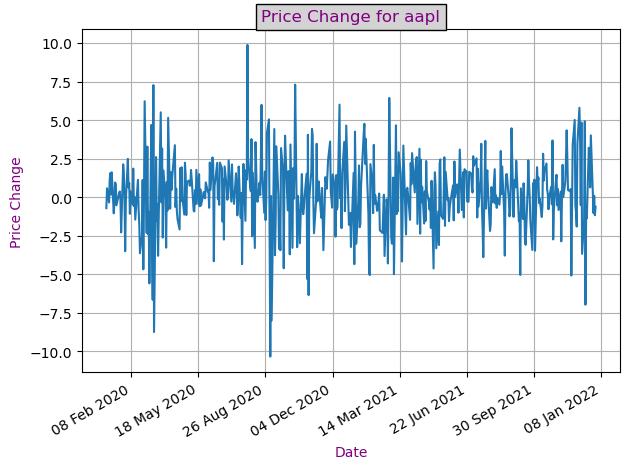

In [10]:
if __name__ == "__main__":
    root = create_main_window()
    ticker_entry, start_date_entry, end_date_entry = create_input_fields(root)
    investment_label = ttk.Label(root, text="Investment: ")
    investment_label.grid(column=0, row=4)
    profit_label = ttk.Label(root, text="Profit: ")
    profit_label.grid(column=0, row=5)
    percentage_return_label = ttk.Label(root, text="Return : ")
    percentage_return_label.grid(column=0, row=6)
    data_dropdown = None
    create_submit_button(root, ticker_entry, start_date_entry, end_date_entry, investment_label, profit_label,
                        percentage_return_label)
    create_display_dataframe_button(root, ticker_entry, start_date_entry, end_date_entry)
    create_plot_data_components(root,data_dropdown)

    root.mainloop()